In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv("C:\\Users\\thris\\Downloads\\Zomato data .csv")
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


In [37]:
df.rename(columns={"listed_in(type)":"type"},inplace=True)

In [38]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost(for two people),type
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   type                         148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [40]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [41]:
df['rate'] = df['rate'].astype(str).str.split('/').str[0].astype(float)

In [42]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost(for two people),type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet


In [49]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
type                           0
dtype: int64

<Axes: xlabel='approx_cost(for two people)', ylabel='Count'>

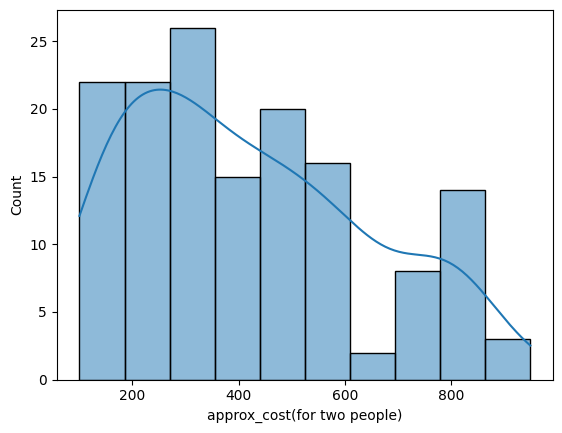

In [55]:
sns.histplot(x="approx_cost(for two people)",data=df,bins=10,kde=True)

<Axes: xlabel='votes', ylabel='Count'>

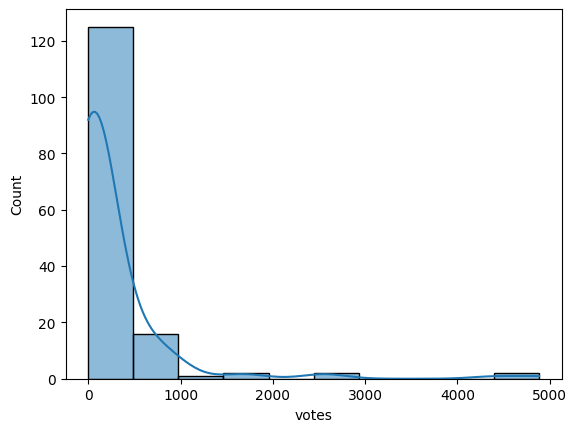

In [53]:
sns.histplot(x="votes",data=df,kde=True,bins=10)

<Axes: xlabel='rate', ylabel='Count'>

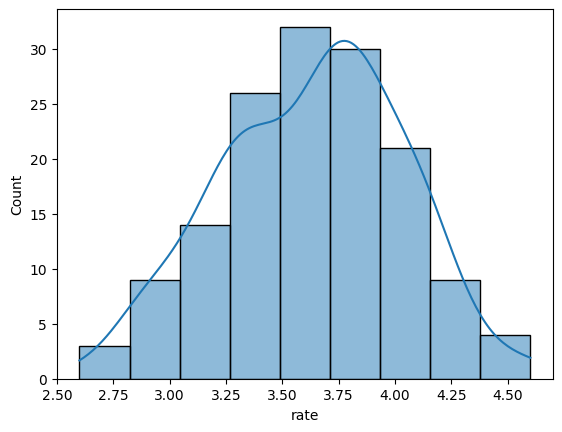

In [54]:
sns.histplot(x="rate",data=df,kde=True)

In [56]:
df["type"].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

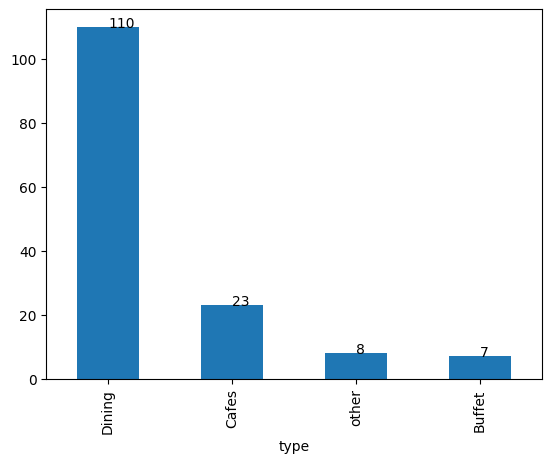

In [58]:
b=df.type.value_counts()
b.plot(kind="bar")
for i,v in enumerate(b):
    plt.text(i,v,str(v))

<Axes: ylabel='count'>

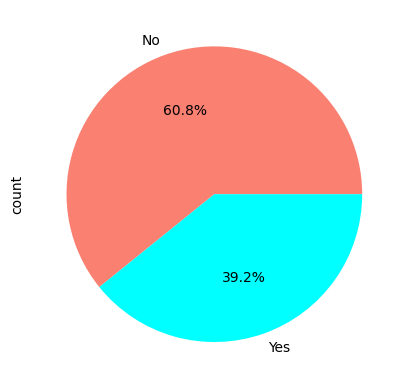

In [86]:
df["online_order"].value_counts().plot(kind="pie",autopct='%1.1f%%',colors=["salmon","cyan"])

<Axes: ylabel='count'>

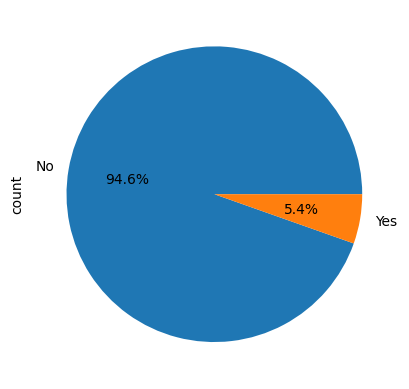

In [84]:
df["book_table"].value_counts().plot(kind="pie",autopct='%1.1f%%',)

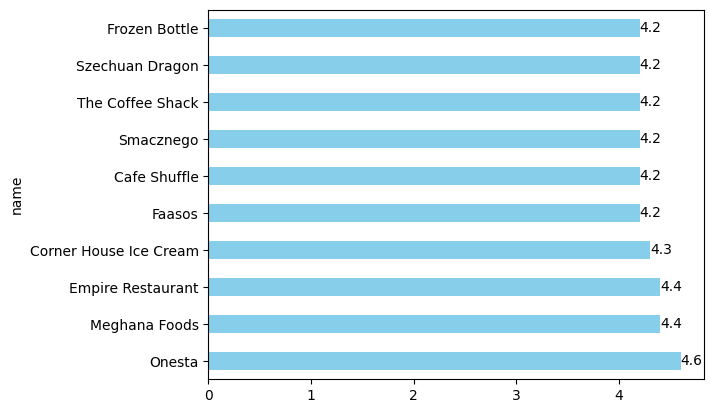

In [93]:
c=df.groupby("name")["rate"].mean().sort_values(ascending=False).head(10)
ax = c.plot(kind="barh", color='skyblue')

for i, (name, value) in enumerate(c.items()):
    ax.text(value, i, f"{value:.1f}", ha='left', va='center', fontsize=10)


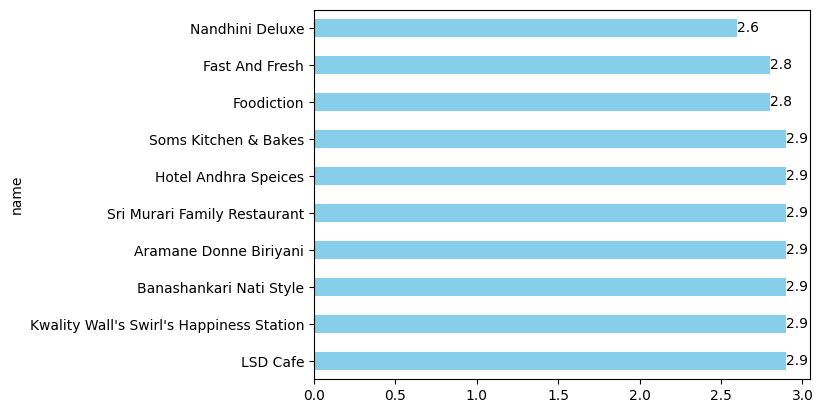

In [97]:
d=df.groupby("name")["rate"].mean().sort_values(ascending=False).tail(10)
ax = d.plot(kind="barh", color='skyblue')

for i, (name, value) in enumerate(d.items()):
    ax.text(value, i, f"{value:.1f}", ha='left', va='center', fontsize=10)


In [111]:
df['rate'].value_counts()


rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

In [113]:
target_rating = float(input("Enter rating:"))

hotels_with_target_rating = df.loc[df['rate'] == target_rating, 'name']
print(hotels_with_target_rating)

2                  San Churro Cafe
4                    Grand Village
5                  Timepass Dinner
14                 San Churro Cafe
15                   Cafe Vivacity
17                Kirthi's Biryani
26                    Coffee Tindi
29                Srinathji's Cafe
40                       Chaatimes
45                        Hotboxit
56     Banashankari Donne Biriyani
62                 Chinese Kitchen
68                      Sugar Rush
79                    Upahar Sagar
80      Kadalu Sea Food Restaurant
83                 Vaishali Deluxe
84                       Chill Out
96                          Kaggis
99                      Polar Bear
103        Floured-Baked With Love
Name: name, dtype: object


In [115]:
e=df.groupby("name")["votes"].mean().sort_values(ascending=False).head(10)
e

name
Empire Restaurant     4884.0
Meghana Foods         4401.0
Onesta                2556.0
Kabab Magic           1720.0
Szechuan Dragon       1647.0
Roving Feast          1047.0
San Churro Cafe        918.0
Gustoes Beer House     868.0
Jeet Restaurant        808.0
Recipe                 804.0
Name: votes, dtype: float64

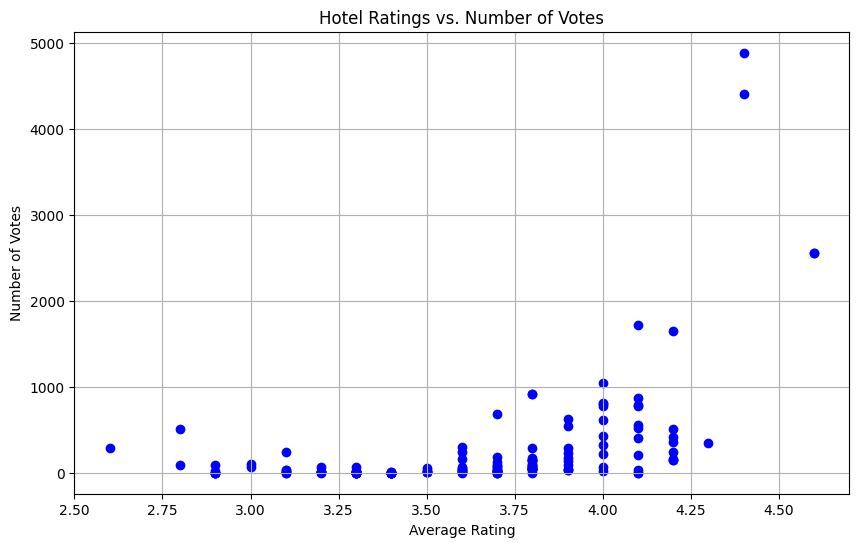

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rate'], df['votes'], color='blue')


plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Hotel Ratings vs. Number of Votes')
plt.grid(True)
plt.show()